<a href="https://colab.research.google.com/github/lanashin/CST2312/blob/main/QUIZ_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Quiz 4 -Avocado CSV

1. Read the file 'avocado.csv' into a Pandas DataFrame df_avocado.

 See this link for the avocado.csv  source file: (https://www.kaggle.com/neuromusic/avocado-prices?select=avocado.csv)

2. Treat the variable 'Date' as a naive Datetime object in the DataFrame df_avocado.

3. Create the following three new variables in the df_avocado DataFrame:     
  3.a 'Year' derived from the Datetime 'Date'     
  3.a 'Month' derived from the Datetime 'Date'     
  3.b 'Sales' derived from the expression of 'AveragePrice' * 'TotalVolume'

5. Produce a summary of 'Sales' by 'Year' and 'Month' using the .groupby() method.

6. Post a shared (accessible) link to the Colab notebook where you completed steps 1 - 5, above or submit your code as an answer to this question.

Solution:


In [22]:
#imported libraries
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import style
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plot

In [12]:
#to read file
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
#open data from my google drive
df_av = pd.read_csv('/content/gdrive/MyDrive/data/avocado.csv')

In [14]:
#'Date' as a naive Datetime object in the DataFrame
df_av_parse = pd.read_csv('/content/gdrive/MyDrive/data/avocado.csv', parse_dates=['Date'])
df_av['Date'] = pd.to_datetime(df_av['Date'])

In [15]:
# 'Year' derived from the Datetime 'Date'
df_av['Year'] = df_av['Date'].dt.year
#a 'Month' derived from the Datetime 'Date'
df_av['Month'] = df_av['Date'].dt.month

print(df_av)

       Unnamed: 0       Date  AveragePrice  ...            region  Year  Month
0               0 2015-12-27          1.33  ...            Albany  2015     12
1               1 2015-12-20          1.35  ...            Albany  2015     12
2               2 2015-12-13          0.93  ...            Albany  2015     12
3               3 2015-12-06          1.08  ...            Albany  2015     12
4               4 2015-11-29          1.28  ...            Albany  2015     11
...           ...        ...           ...  ...               ...   ...    ...
18244           7 2018-02-04          1.63  ...  WestTexNewMexico  2018      2
18245           8 2018-01-28          1.71  ...  WestTexNewMexico  2018      1
18246           9 2018-01-21          1.87  ...  WestTexNewMexico  2018      1
18247          10 2018-01-14          1.93  ...  WestTexNewMexico  2018      1
18248          11 2018-01-07          1.62  ...  WestTexNewMexico  2018      1

[18249 rows x 16 columns]


In [16]:
# 'Sales' derived from the expression of 'AveragePrice' * 'TotalVolume'
df_av['Sales'] = (df_av['AveragePrice'] * df_av['Total Volume'])

In [17]:
print(df_av)

       Unnamed: 0       Date  AveragePrice  ...  Year  Month        Sales
0               0 2015-12-27          1.33  ...  2015     12   85434.7046
1               1 2015-12-20          1.35  ...  2015     12   74083.9230
2               2 2015-12-13          0.93  ...  2015     12  109944.8046
3               3 2015-12-06          1.08  ...  2015     12   85311.5220
4               4 2015-11-29          1.28  ...  2015     11   65330.6880
...           ...        ...           ...  ...   ...    ...          ...
18244           7 2018-02-04          1.63  ...  2018      2   27831.9729
18245           8 2018-01-28          1.71  ...  2018      1   23748.5484
18246           9 2018-01-21          1.87  ...  2018      1   25743.8412
18247          10 2018-01-14          1.93  ...  2018      1   31276.0746
18248          11 2018-01-07          1.62  ...  2018      1   28333.1196

[18249 rows x 17 columns]


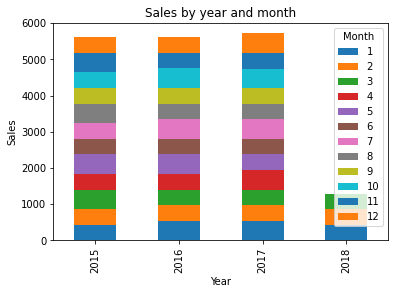

In [27]:
#Produce a summary of 'Sales' by 'Year' and 'Month' using the .groupby() method.
df_av.groupby(['Year','Month']).size().unstack().plot(kind='bar', stacked=True)
plt.title("Sales by year and month")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()